# Setup

In [1]:
GAME = 'Breakout-v4'
frames_to_play = 5000000

In [2]:
import base
from src.agents import DoubleDeepQAgent
from src.util import JupyterCallback
from src.downsamplers import downsample_breakout

/usr/local/anaconda5/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
import os
import gym
import pandas as pd
%matplotlib inline

In [4]:
out_dir = 'results/{}'.format(DoubleDeepQAgent.__name__)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Environment

In [5]:
env = gym.make(GAME)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(4)

# Agent

In [8]:
agent = DoubleDeepQAgent(env, downsample_breakout, render_mode='rgb_array')
agent

DoubleDeepQAgent(
    env=<TimeLimit<AtariEnv<Breakout-v4>>>,
    downsample=Downsampler(y=(32, 14), x=(8, 8), cut=[142]),
    replay_memory_size=250000,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x2b3de90cf5f8>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x2b3de32d72f0>,
    image_size=(84, 84),
    render_mode='rgb_array',
    target_update_freq=10000
)

In [9]:
initial = agent.play()
initial = pd.Series(initial)
initial

100%|██████████| 100/100 [02:19<00:00,  1.39s/game]


0    -5.0
1     1.0
2    -5.0
3    -5.0
4    -3.0
5    -3.0
6    -5.0
7    -2.0
8    -5.0
9    -2.0
10   -3.0
11   -5.0
12   -1.0
13   -3.0
14   -5.0
15   -3.0
16   -5.0
17   -5.0
18   -4.0
19   -5.0
20   -5.0
21   -3.0
22   -5.0
23   -4.0
24   -5.0
25   -3.0
26   -3.0
27   -5.0
28   -5.0
29   -5.0
     ... 
70   -3.0
71   -4.0
72   -5.0
73   -3.0
74   -1.0
75   -5.0
76   -5.0
77   -3.0
78   -4.0
79   -5.0
80   -5.0
81   -5.0
82   -4.0
83   -4.0
84   -3.0
85   -4.0
86   -3.0
87   -1.0
88   -3.0
89   -1.0
90   -5.0
91   -5.0
92   -1.0
93   -2.0
94   -5.0
95   -5.0
96   -3.0
97   -4.0
98   -4.0
99   -4.0
Length: 100, dtype: float64

## Initial

In [10]:
initial.to_csv('{}/initial.csv'.format(out_dir))

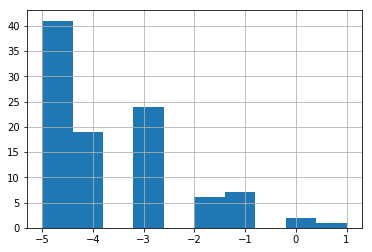

In [11]:
initial.hist()

In [12]:
initial.describe()

count    100.000000
mean      -3.710000
std        1.423433
min       -5.000000
25%       -5.000000
50%       -4.000000
75%       -3.000000
max        1.000000
dtype: float64

## Training

In [13]:
agent.observe()

100%|██████████| 50000/50000 [00:44<00:00, 1132.52frame/s]


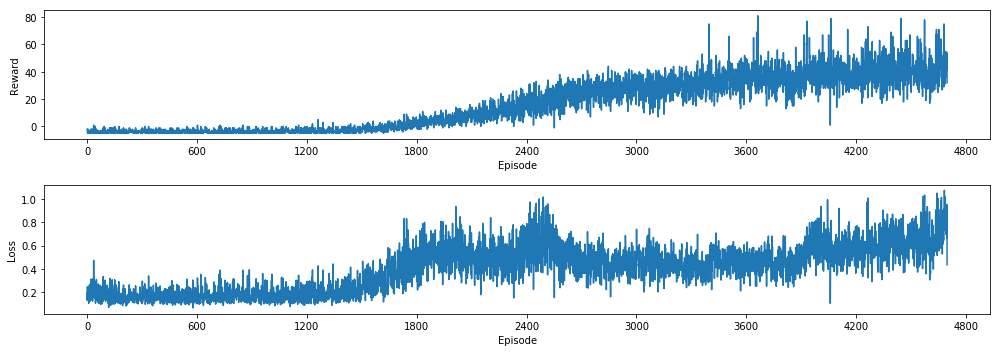

100%|██████████| 5000000/5000000 [7:50:50<00:00, 182.33frame/s, loss=0.435, score=32]


In [14]:
callback = JupyterCallback()
agent.train(frames_to_play=frames_to_play, callback=callback)

## Final

In [15]:
final = agent.play()
final = pd.Series(final)
final

100%|██████████| 100/100 [08:01<00:00,  4.82s/game]


0     63.0
1     49.0
2     56.0
3     69.0
4     48.0
5     50.0
6     44.0
7     40.0
8     30.0
9     45.0
10    55.0
11    62.0
12    70.0
13    37.0
14    61.0
15    49.0
16    50.0
17    55.0
18    43.0
19    35.0
20    61.0
21    59.0
22    41.0
23    25.0
24    67.0
25    46.0
26    23.0
27    32.0
28    54.0
29    50.0
      ... 
70    65.0
71    60.0
72    45.0
73    58.0
74    78.0
75    28.0
76    41.0
77    61.0
78    68.0
79    72.0
80    58.0
81    53.0
82    42.0
83    61.0
84    61.0
85    64.0
86    49.0
87    40.0
88    61.0
89    61.0
90    45.0
91    44.0
92    57.0
93    46.0
94    44.0
95    36.0
96    80.0
97    46.0
98    37.0
99    39.0
Length: 100, dtype: float64

In [16]:
final.to_csv('{}/final.csv'.format(out_dir))

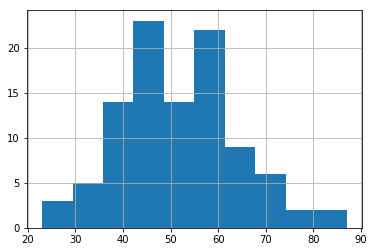

In [17]:
final.hist()

In [18]:
final.describe()

count    100.000000
mean      51.710000
std       12.549937
min       23.000000
25%       43.750000
50%       50.000000
75%       61.000000
max       87.000000
dtype: float64

## Saving Weights

In [19]:
agent.model.save_weights('{}/weights.h5'.format(out_dir), overwrite=True)